# $$
\text{TP N°1. Calcul approché des zéros d'une fonction.}
$$

Nous cherchons à comparer les méthodes de Picard et de Newton pour le calcul d'une valeur approchée de l'unique solution réelle $\ell$ de l'équation
$$
\ell = e^{- \ell}.
$$

1. Tracer les courbes représentatives des fonctions $x \mapsto x$ et $x \mapsto e^{- x}$ sur l'intervalle $[0, 1]$.

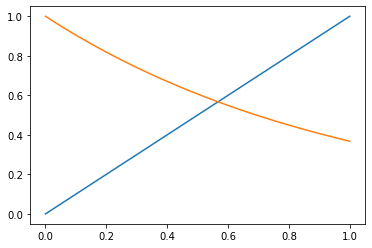

In [1]:
from matplotlib.pyplot import *
from numpy import *

x = linspace(0, 1, 100)
y = x
z= exp(-x)
plot(x, y)
plot(x, z)
show()

2.a. Définir une fonction _Picard_ qui prend en entrée deux nombres $a \in \mathbb{R}$ et $\varepsilon > 0$, et renvoie une valeur approchée du nombre $\ell$ par la méthode du point fixe :
$$
x_0 = a \in \mathbb{R}, \quad \text{ et } \quad \forall n \in \mathbb{N}, \, x_{n+ 1} = e^{- x_n},
$$
à une erreur de l'ordre de $\varepsilon$ près.

In [2]:
def Picard(a, eps):
    x0 = a
    x1 = exp(-x0)
    while abs(x1-x0) > eps:
        x0 = x1
        x1 = exp(-x0)
    return x1

# Test de la fonction Picard pour a = 0 et eps = 1e-15

a = 0
eps = 1e-15
l = Picard(a, eps)
print("l(Picard) =", l,"\n")
print("Erreur(Picard) =", l-exp(-l),"\n")

l(Picard) = 0.5671432904097835 

Erreur(Picard) = -5.551115123125783e-16 



b. Vérifier numériquement que la valeur approchée de $\ell$ donnée par la fonction _Picard_ ne dépend pas du choix de la valeur initiale $a \in \mathbb{R}$.

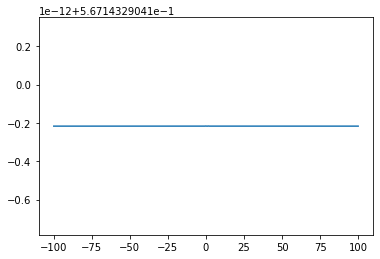

In [3]:
A = linspace(-100, 100, 500)
B = []
for i in range(0,500):
    B.append(Picard(A[i], eps))
plot(A, B)
show()

3.a. Définir une fonction _Newton_ qui prend en entrée deux nombres $b \in \mathbb{R}$ et $\varepsilon > 0$, et renvoie une valeur approchée du nombre $\ell$ par la méthode de Newton pour la fonction $x \mapsto e^{- x} - x$ :
$$
y_0 = b \in \mathbb{R}, \quad \text{ et } \quad \forall n \in \mathbb{N}, \, y_{n+ 1} = \frac{y_n + 1}{e^{y_n} + 1},
$$
à une erreur de l'ordre de $\varepsilon$ près.

In [4]:
def Newton(b, eps):
    y0 = a
    y1 = (1 + y0)/(1 + exp(y0))
    while abs(y1-y0) > eps:
        y0 = y1
        y1 = (1 + y0)/(1 + exp(y0))
    return y1

# Test de la fonction Newton pour b = 0 et eps = 1e-15

b = 0
l = Newton(b, eps)
print("l(Newton) =", l,"\n")
print("Erreur(Newton) =", l-exp(-l),"\n")

l(Newton) = 0.5671432904097838 

Erreur(Newton) = 0.0 



b. Vérifier numériquement que la valeur approchée de $\ell$ donnée par la fonction _Newton_ ne dépend pas du choix de la valeur initiale $b \in \mathbb{R}$.

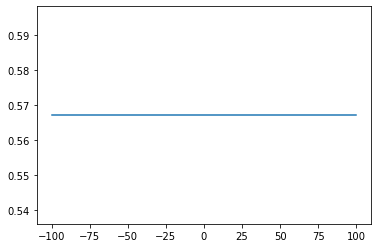

In [5]:
C = []
for i in range(0,500):
    C.append(Newton(A[i], eps))
plot(A, C)
show()

c. Comparer numériquement les vitesses de convergence des fonctions _Picard_ et _Newton_.

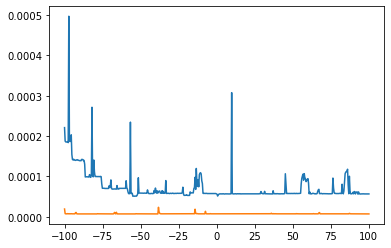

In [6]:
from time import *

TP = []
for i in range(0,500):
    t = time();
    Picard(A[i], eps)
    TP.append(time()-t)
TN = []
for i in range(0,500):
    t = time();
    Newton(A[i], eps)
    TN.append(time()-t)
plot(A, TP)
plot(A, TN)
show()